In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import plotly.offline as py
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pylab as pylab

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.express as px
import mplcursors

In [2]:
bubble_df = pd.read_csv('bubble.csv', encoding='unicode_escape')
bubble_df.head()

,name,date,quarter,year,acv in k,account users,winning competitor,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,day,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,uq
0,Arizona Science Center-cloud,1/28/2019,one,2019,5,500,Canvas,NaN,NaN,"5,000",0.0,28,NaN,NaN,NaN,NaN,NaN
1,Autry Technology Center-Cloud,1/30/2019,one,2019,9,610,Blackboard,NaN,NaN,"9,505",505.0,30,NaN,NaN,NaN,NaN,NaN
2,Bronston Canadian Academy-cloud,1/29/2019,one,2019,4,200,Canvas,NaN,NaN,"4,936",936.0,29,NaN,NaN,NaN,NaN,NaN
3,Cherry Creek Online- Free Pilot,1/15/2019,one,2019,0,55000,Canvas,NaN,NaN,0,NaN,15,NaN,NaN,NaN,NaN,NaN
4,Columbia Heights Public Schools Pilot,1/4/2019,one,2019,0,3269,Canvas,NaN,NaN,0,NaN,4,NaN,NaN,NaN,NaN,NaN


In [3]:
bubbles_df = bubble_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'day', 
               'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'uq'], axis=1)
bubbles_df.head()

,name,date,quarter,year,acv in k,account users,winning competitor
0,Arizona Science Center-cloud,1/28/2019,one,2019,5,500,Canvas
1,Autry Technology Center-Cloud,1/30/2019,one,2019,9,610,Blackboard
2,Bronston Canadian Academy-cloud,1/29/2019,one,2019,4,200,Canvas
3,Cherry Creek Online- Free Pilot,1/15/2019,one,2019,0,55000,Canvas
4,Columbia Heights Public Schools Pilot,1/4/2019,one,2019,0,3269,Canvas


In [84]:
bubbles_df['winning competitor'] = bubbles_df['winning competitor'].replace(to_replace='No Winning Competitor', value='None')
bubbles_df['winning competitor'].unique()

array(['Canvas', 'Blackboard', 'Schoology', 'None', 'Google', 'Moodle',
       'Other', 'Haiku'], dtype=object)

In [85]:

bubbles_df['date_parsed'] = pd.to_datetime(bubbles_df['date'], format = '%m/%d/%Y')
bubbles_df.head()
bubbles_df['date_parsed'].dtype

dtype('<M8[ns]')

In [86]:
color = []
for i in bubbles_df['winning competitor']:
    if i == 'Canvas':
        color.append('#3F8EDB')
    else:
        color.append('#DA3026')
bubbles_df['color'] = color 
bubbles_df.head()




,name,date,quarter,year,acv in k,account users,winning competitor,date_parsed,color,acv
0,Arizona Science Center-cloud,1/28/2019,one,2019,5,500,Canvas,2019-01-28,#3F8EDB,5000
1,Autry Technology Center-Cloud,1/30/2019,one,2019,9,610,Blackboard,2019-01-30,#DA3026,9000
2,Bronston Canadian Academy-cloud,1/29/2019,one,2019,4,200,Canvas,2019-01-29,#3F8EDB,4000
3,Cherry Creek Online- Free Pilot,1/15/2019,one,2019,0,55000,Canvas,2019-01-15,#3F8EDB,0
4,Columbia Heights Public Schools Pilot,1/4/2019,one,2019,0,3269,Canvas,2019-01-04,#3F8EDB,0


In [87]:
bubbles_df['acv'] = 1000 * bubbles_df['acv in k']
bubbles_df.head()

,name,date,quarter,year,acv in k,account users,winning competitor,date_parsed,color,acv
0,Arizona Science Center-cloud,1/28/2019,one,2019,5,500,Canvas,2019-01-28,#3F8EDB,5000
1,Autry Technology Center-Cloud,1/30/2019,one,2019,9,610,Blackboard,2019-01-30,#DA3026,9000
2,Bronston Canadian Academy-cloud,1/29/2019,one,2019,4,200,Canvas,2019-01-29,#3F8EDB,4000
3,Cherry Creek Online- Free Pilot,1/15/2019,one,2019,0,55000,Canvas,2019-01-15,#3F8EDB,0
4,Columbia Heights Public Schools Pilot,1/4/2019,one,2019,0,3269,Canvas,2019-01-04,#3F8EDB,0


In [124]:
bigdeals = bubbles_df['acv'] >= 250000
bigdeals_df = bubbles_df[bigdeals]
bigdeals_df.head()
bigdeals_df[bigdeals_df['winning competitor'] == 'Canvas'].groupby(['year', 'quarter'])['acv'].sum()

year  quarter
2019  two        358000
Name: acv, dtype: int64

In [125]:

bigdeals_df[bigdeals_df['winning competitor'] != 'Canvas'].groupby(['year', 'quarter'])['acv'].sum()

year  quarter
2019  one        300000
Name: acv, dtype: int64

In [140]:
meddeals = bubbles_df['acv'] >= 100000 
meddeals_df = bubbles_df[meddeals]
meddeals_df.head()
meddeals_df[meddeals_df['winning competitor'] == 'Canvas'].groupby(['year'])['acv'].sum()

year
2018    935000
2019    614000
Name: acv, dtype: int64

In [145]:
meddeals_df[meddeals_df['winning competitor'] != 'Canvas'].groupby(['year'])['acv'].sum()

year
2018     943000
2019    2322000
Name: acv, dtype: int64

In [142]:
smalldeals = bubbles_df['acv'] <= 100000 
smalldeals_df = bubbles_df[smalldeals]
smalldeals_df.head()
smalldeals_df[smalldeals_df['winning competitor'] == 'Canvas'].groupby(['year'])['acv'].sum()

year
2018    2015000
2019    1085000
Name: acv, dtype: int64

In [146]:
smalldeals_df[smalldeals_df['winning competitor'] != 'Canvas'].groupby(['year'])['acv'].sum()

year
2018    4276000
2019    3552000
Name: acv, dtype: int64

In [144]:
bubbles_df[bubbles_df['winning competitor'] != 'Canvas'].groupby(['year'])['acv'].sum()

year
2018    5219000
2019    5874000
Name: acv, dtype: int64

In [105]:
sum_df = bubbles_df.groupby(['year','quarter', 'winning competitor'])['acv'].sum()


In [91]:
year_df = bubbles_df.groupby(['year', 'winning competitor'])['acv'].sum()
year_df

year  winning competitor
2018  Blackboard             130000
      Canvas                2950000
      Google                1325000
      Haiku                   71000
      Moodle                  96000
      None                  1281000
      Other                 1258000
      Schoology             1058000
2019  Blackboard               9000
      Canvas                1699000
      Google                 629000
      Haiku                   39000
      Moodle                 216000
      None                  3403000
      Other                  842000
      Schoology              736000
Name: acv, dtype: int64

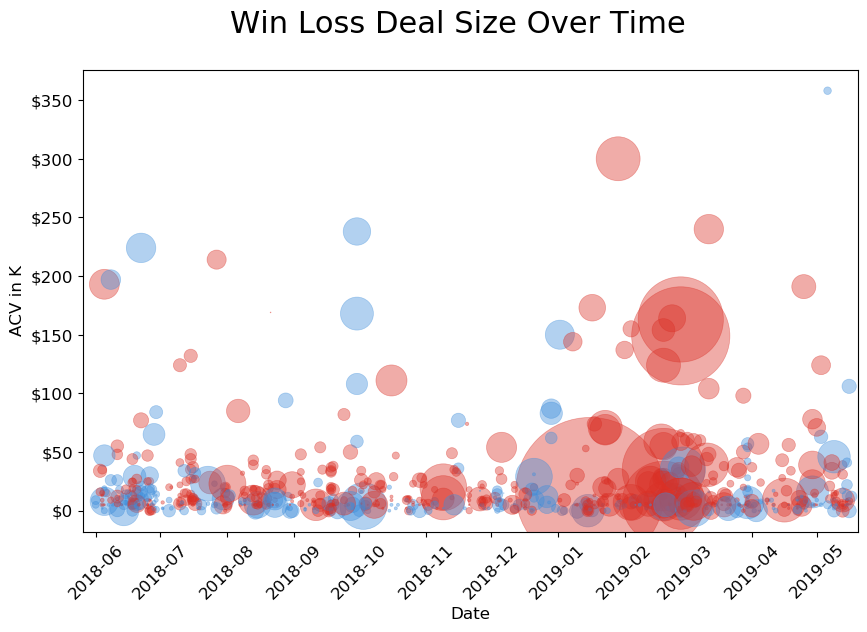

In [104]:
import datetime
x = bubbles_df['date_parsed']
y = bubbles_df['acv in k']
z = bubbles_df['account users']
c = bubbles_df['color']

figure, ax = plt.subplots(figsize=(10,6))

plt.scatter(x, y, s=z*0.01, c=c, alpha=0.4, linewidths=0.5)
plt.ylabel('ACV in K')
plt.xlabel('Date')
plt.xticks(rotation=45)

ax.set_xlim([datetime.date(2018, 5, 26), datetime.date(2019, 5, 20)])

y_labels = ax.get_yticks()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.suptitle('Win Loss Deal Size Over Time', fontsize=22)
plt.savefig('bubbles.png')

plt.show()


In [93]:
win_df = bubbles_df.groupby(['winning competitor'])['acv'].sum()

win_df

winning competitor
Blackboard     139000
Canvas        4649000
Google        1954000
Haiku          110000
Moodle         312000
None          4684000
Other         2100000
Schoology     1794000
Name: acv, dtype: int64

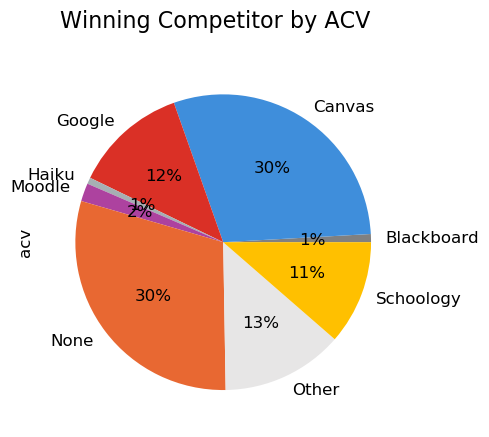

In [101]:
#plt.rcParams['figure.figsize'] = [10, 10]
color_list = ['#808080', '#3F8EDB', '#DA3026', '#A6AFB3', '#AD429F', '#E86832', '#E7E6E6', '#FFC000']

fig, ax = plt.subplots()
plt.rc('font', size=12)
#axes.labelsize
plot = win_df.plot.pie(autopct='%1.0f%%', colors=color_list)
plt.suptitle('Winning Competitor by ACV', fontsize=16)
plt.savefig('wlpie.png')
#plt.tight_layout()
plt.show()

In [18]:
big_deals_df = pd.read_csv('big deals.csv', encoding='unicode_escape')
big_deals_df.head()

,Unnamed: 0,Fiscal Year â,Unnamed: 2,Opportunity Name,acv,Annual Contract Value (Sales) (converted),Institution Type,Type,Stage,Total Contract Value (Sales) (converted),Close Date,Created Date,Account Name,Contracted Quantity: User
0,NaN,2013.0,NaN,District School Board of Pasco County-Cloud,"$378,800","USD 378,800.00",K12 - District,New Logo,Closed Won,"$1,120,400",6/20/2013,1/16/2013,Pasco County Schools,75000.0
1,NaN,NaN,NaN,Clark County School District - Cloud,"$237,450","USD 237,450.00",K12 - District,New Logo,Closed Won,"$749,500",3/29/2013,1/17/2013,Clark County School District (CCSD),90000.0
2,NaN,NaN,NaN,Knox County Schools-Cloud,"$224,520","USD 224,520.00",K12 - District,New Logo,Closed Won,"$224,520",8/22/2013,4/11/2013,Knox County Schools-TN,62099.0
3,NaN,2014.0,NaN,Rock Hill School Dist 3-Cloud,"$186,295","USD 186,295.00",K12 - District,New Logo,Closed Won,"$535,008",5/20/2014,11/28/2012,Rock Hill School District 3,19131.0
4,NaN,NaN,NaN,Howard County Public School System-Cloud,"$415,251","USD 415,251.00",K12 - District,New Logo,Closed Won,"$1,514,835",12/19/2014,12/14/2012,Howard County Public School District,52000.0


In [19]:
big_deals_df['date_parsed'] = pd.to_datetime(big_deals_df['Close Date'], format = '%m/%d/%Y')
big_deals_df.head()
big_deals_df['date_parsed'].dtype

dtype('<M8[ns]')

In [20]:
big_deals_df['year'] = pd.DatetimeIndex(big_deals_df['date_parsed']).year
big_deals_df.head()


,Unnamed: 0,Fiscal Year â,Unnamed: 2,Opportunity Name,acv,Annual Contract Value (Sales) (converted),Institution Type,Type,Stage,Total Contract Value (Sales) (converted),Close Date,Created Date,Account Name,Contracted Quantity: User,date_parsed,year
0,NaN,2013.0,NaN,District School Board of Pasco County-Cloud,"$378,800","USD 378,800.00",K12 - District,New Logo,Closed Won,"$1,120,400",6/20/2013,1/16/2013,Pasco County Schools,75000.0,2013-06-20,2013
1,NaN,NaN,NaN,Clark County School District - Cloud,"$237,450","USD 237,450.00",K12 - District,New Logo,Closed Won,"$749,500",3/29/2013,1/17/2013,Clark County School District (CCSD),90000.0,2013-03-29,2013
2,NaN,NaN,NaN,Knox County Schools-Cloud,"$224,520","USD 224,520.00",K12 - District,New Logo,Closed Won,"$224,520",8/22/2013,4/11/2013,Knox County Schools-TN,62099.0,2013-08-22,2013
3,NaN,2014.0,NaN,Rock Hill School Dist 3-Cloud,"$186,295","USD 186,295.00",K12 - District,New Logo,Closed Won,"$535,008",5/20/2014,11/28/2012,Rock Hill School District 3,19131.0,2014-05-20,2014
4,NaN,NaN,NaN,Howard County Public School System-Cloud,"$415,251","USD 415,251.00",K12 - District,New Logo,Closed Won,"$1,514,835",12/19/2014,12/14/2012,Howard County Public School District,52000.0,2014-12-19,2014


In [21]:
big_deals_df['acv'] = big_deals_df['acv'].replace('\$','',regex=True)
big_deals_df['acv'] = big_deals_df['acv'].replace('\,','',regex=True).astype(int)
big_deals_df.head()

,Unnamed: 0,Fiscal Year â,Unnamed: 2,Opportunity Name,acv,Annual Contract Value (Sales) (converted),Institution Type,Type,Stage,Total Contract Value (Sales) (converted),Close Date,Created Date,Account Name,Contracted Quantity: User,date_parsed,year
0,NaN,2013.0,NaN,District School Board of Pasco County-Cloud,378800,"USD 378,800.00",K12 - District,New Logo,Closed Won,"$1,120,400",6/20/2013,1/16/2013,Pasco County Schools,75000.0,2013-06-20,2013
1,NaN,NaN,NaN,Clark County School District - Cloud,237450,"USD 237,450.00",K12 - District,New Logo,Closed Won,"$749,500",3/29/2013,1/17/2013,Clark County School District (CCSD),90000.0,2013-03-29,2013
2,NaN,NaN,NaN,Knox County Schools-Cloud,224520,"USD 224,520.00",K12 - District,New Logo,Closed Won,"$224,520",8/22/2013,4/11/2013,Knox County Schools-TN,62099.0,2013-08-22,2013
3,NaN,2014.0,NaN,Rock Hill School Dist 3-Cloud,186295,"USD 186,295.00",K12 - District,New Logo,Closed Won,"$535,008",5/20/2014,11/28/2012,Rock Hill School District 3,19131.0,2014-05-20,2014
4,NaN,NaN,NaN,Howard County Public School System-Cloud,415251,"USD 415,251.00",K12 - District,New Logo,Closed Won,"$1,514,835",12/19/2014,12/14/2012,Howard County Public School District,52000.0,2014-12-19,2014


In [22]:
crosstab = pd.read_csv('crosstab.csv', encoding='unicode_escape')
crosstab.head()


,type,new logo,upsell
0,2014,1725248.00,908442.68
1,2015,4542510.61,690052.50
2,2016,4566108.06,1745287.50
3,2017,1788810.76,2465744.38
4,2018,1392655.00,3527716.40


In [23]:
crosstab['date'] = pd.to_datetime(crosstab['type'], format = '%Y')
crosstab['year'] = pd.DatetimeIndex(crosstab['date']).year
crosstab = crosstab.drop(['type', 'date'], axis=1)
crosstab.head()


,new logo,upsell,year
0,1725248.00,908442.68,2014
1,4542510.61,690052.50,2015
2,4566108.06,1745287.50,2016
3,1788810.76,2465744.38,2017
4,1392655.00,3527716.40,2018


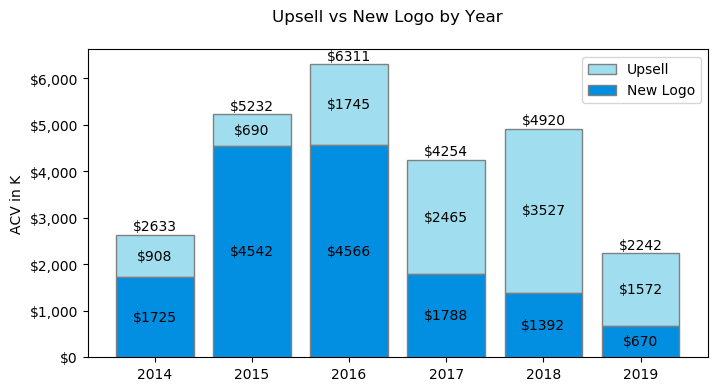

In [24]:
color1 = '#028EE1'
color2 = '#A0DDEE'

x = crosstab['year']
y2 = crosstab['upsell']/1000
y1 = crosstab['new logo']/1000


snum = y1+y2
mpl.style.use('default')
figure, ax = plt.subplots(figsize=(8,4))

plt.bar(x, y2, bottom=y1, label='Upsell', color=color2, edgecolor='gray') # this arrangement = legend in the right order
plt.bar(x, y1, label='New Logo', color=color1, edgecolor='gray')

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, '$%d'%yval, ha='center', va='center')
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, '$%d'%yval, ha='center', va='center')
for xpos, ypos, yval in zip(x, y1+y2, snum):
    plt.text(xpos, ypos, '$%d\n'%yval, ha='center', va='center') # this printf has a line return after it

y_labels = ax.get_yticks()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x)))) # this gives me the $ and ,

plt.suptitle('Upsell vs New Logo by Year')
plt.ylabel('ACV in K')
plt.legend(bbox_to_anchor=(1, 0.9), loc='center right')
plt.savefig('upsell_newlogo.png')

plt.show()


In [164]:
att_df = pd.read_csv('attainment tracker.csv', encoding='unicode_escape')
att_df.head()


,Year,Pilot,New Logo
0,2016,62,354
1,2017,55,325
2,2018,82,237
3,2019,82,183
4,2019p,117,261


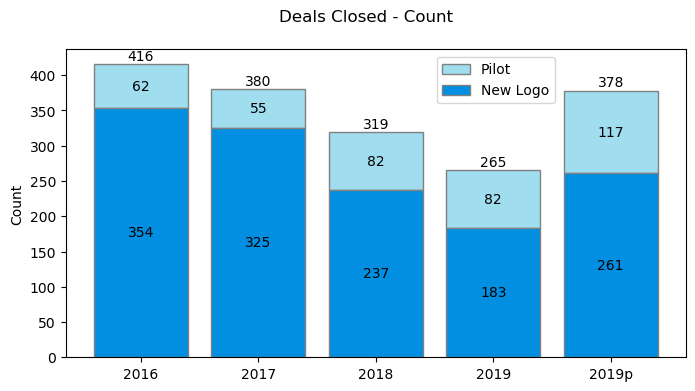

In [165]:
color1 = '#028EE1'
color2 = '#A0DDEE'

x = att_df['Year']
y2 = att_df['Pilot']
y1 = att_df['New Logo']


snum = y1+y2
mpl.style.use('default')
figure, ax = plt.subplots(figsize=(8,4))

plt.bar(x, y2, bottom=y1, label='Pilot', color=color2, edgecolor='gray') # this arrangement = legend in the right order
plt.bar(x, y1, label='New Logo', color=color1, edgecolor='gray')

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, '%d'%yval, ha='center', va='center')
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, '%d'%yval, ha='center', va='center')
for xpos, ypos, yval in zip(x, y1+y2, snum):
    plt.text(xpos, ypos, '%d\n'%yval, ha='center', va='center') # this printf has a line return after it


y_labels = ax.get_yticks()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # this gives me the $ and ,

plt.suptitle('Deals Closed - Count')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(.8, 0.9), loc='center right')
plt.savefig('attainment.png')

plt.show()

In [171]:
loss_df = pd.read_csv('loss reasons l12m.csv', encoding='unicode_escape')

loss_df.columns = ['Reason', 'ACV in K']
loss_df = loss_df.set_index('Reason')
loss_df.head()

,ACV in K
Reason,
Cancelled Eval,6722
Other,4287
Quiz/Assgt,1036
Messaging,1325
SIS Int,1420


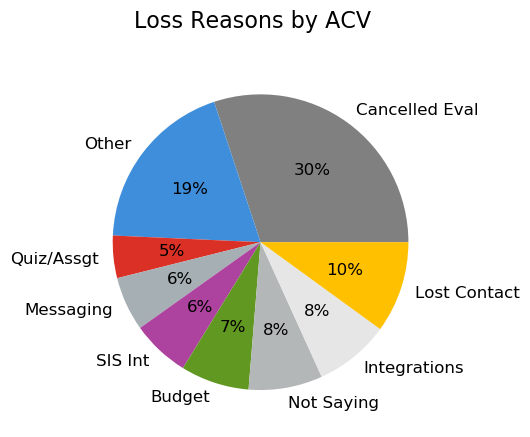

In [193]:

color_list = ['#808080', '#3F8EDB', '#DA3026', '#A6AFB3', '#AD429F','#619822', '#B4B7B8', '#E7E6E6', '#FFC000', '#E8E8E8']


plt.rc('font', size=12)

loss_df.plot(kind='pie', subplots=True, autopct='%1.0f%%', colors=color_list, legend=None)
pylab.ylabel('')
plt.suptitle('Loss Reasons by ACV', fontsize=16)
plt.savefig('losspie.png')

plt.show()